In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#ML
from prophet import Prophet
sns.set(font_scale=1.5)

## Read in data

In [21]:
# Prepare the data. This script fixes the ABBREV.csv file and pulls the foods into their respective food groups
%run data_prep.py

In [22]:
averages_list = [water_average, fruits_average, cheeses_average, milks_average, soups_average, cereals_average, cookies_average, babyfoods_average, beans_average, rice_average, ice_creams_average, chips_average, pasta_average, fast_food_average, pizza_average, school_lunches_average, bread_average, fish_average, candy_average, na_beverages_average, alcoholic_beverages_average, dressings_average, eggs_average, yogurts_average, oils_average, cake_average, butter_average, chicken_average, duck_average, goose_average, emu_average, ostrich_average, cow_average, pig_average, lamb_average, veal_average, game_average, gravy_average, pie_average, pudding_average, veggies_average, nuts_average, chocolates_average, snacks_average]

# combine all the dataframes into one using concat
all_averages = pd.concat(averages_list, ignore_index=True)

all_averages = all_averages.sort_values(by='Health_Score', ascending=False)
all_averages['Name'] = all_averages['Name'].str.replace('_Average', '')
all_averages['Name'] = all_averages['Name'].str.replace('_average', '')
all_averages

,id,Name,Calories,Protein_(mg),Carbs_(mg),Fiber_(mg),Sugar_(mg),Calcium_(mg),Sodium_(mg),Total_Fat_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg),Unhealthy_Nutrients,Healthy_Nutrients,Health_Score
0,99999,water,0.33,0.00,43.33,0.00,0.00,5.00,5.67,0.00,1.33,99943.33,0.00,0.00,99956.67,99956.67
31,99999,ostrich,135.94,24553.33,0.00,0.00,0.00,5.72,77.22,2378.17,332.78,72170.00,0.94,4693.11,99163.60,99110.47
30,99999,emu,133.00,26106.67,0.00,0.00,0.00,5.33,97.67,1600.42,321.67,70396.67,6.61,3129.08,98572.05,98537.90
29,99999,goose,218.00,21041.43,1095.71,0.00,313.33,22.71,90.57,10196.86,317.29,62875.71,5936.09,18491.71,98100.07,97927.28
35,99999,veal,185.06,24004.19,381.24,5.15,21.92,16.30,94.10,7089.15,297.76,65380.86,2211.90,12828.42,96551.20,96303.39
36,99999,game,157.88,26626.79,0.00,0.00,0.00,10.43,61.56,3167.92,353.57,67109.46,1.60,6489.80,96372.87,96263.77
28,99999,duck,208.77,19182.31,5117.69,66.67,5245.00,13.54,117.08,8870.08,221.33,62877.69,4150.74,18145.92,93382.90,93131.78
32,99999,cow,208.22,23583.69,639.42,48.18,93.14,13.77,104.98,9973.41,309.23,62967.46,362.39,16840.22,93356.28,93092.65
17,99999,fish,173.93,18668.08,3459.69,335.14,485.31,43.57,330.19,5847.88,345.68,67072.80,1071.87,12171.67,93343.83,92751.47
34,99999,lamb,223.54,22374.97,129.04,9.02,14.46,13.93,70.87,11542.55,270.58,62570.21,890.95,20720.43,92702.21,92329.28


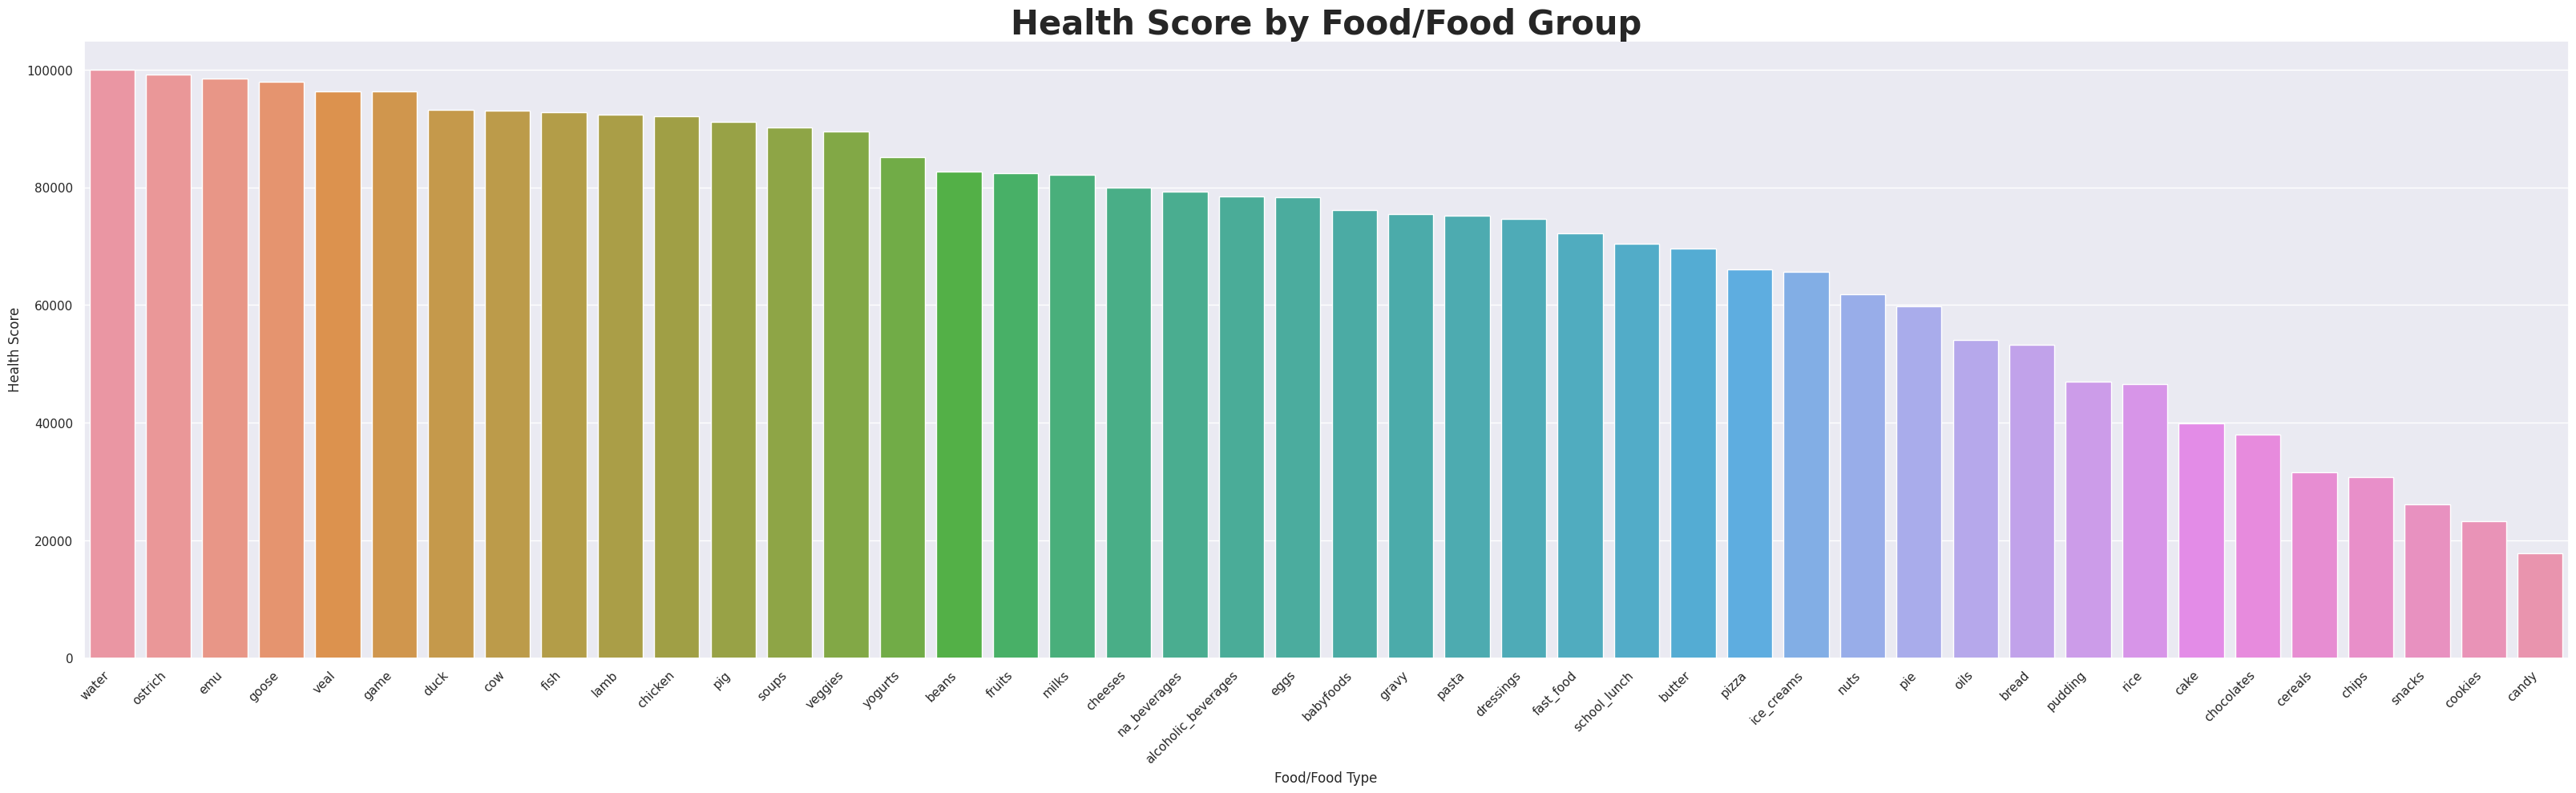

In [23]:
#Create bar graph of top ten Countries by coffee consumption
sns.set(rc={"figure.figsize":(40, 10)})
nutrition_barplot = sns.barplot(x=all_averages['Name'], y = all_averages['Health_Score'])
nutrition_barplot.set_ylabel('Health Score')
nutrition_barplot.set_xlabel('Food/Food Type')
nutrition_barplot.set_title('Health Score by Food/Food Group', fontdict={'size': 30, 'weight': 'bold'})
nutrition_barplot.set_xticklabels(nutrition_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylim(0,50000)
plt.show()

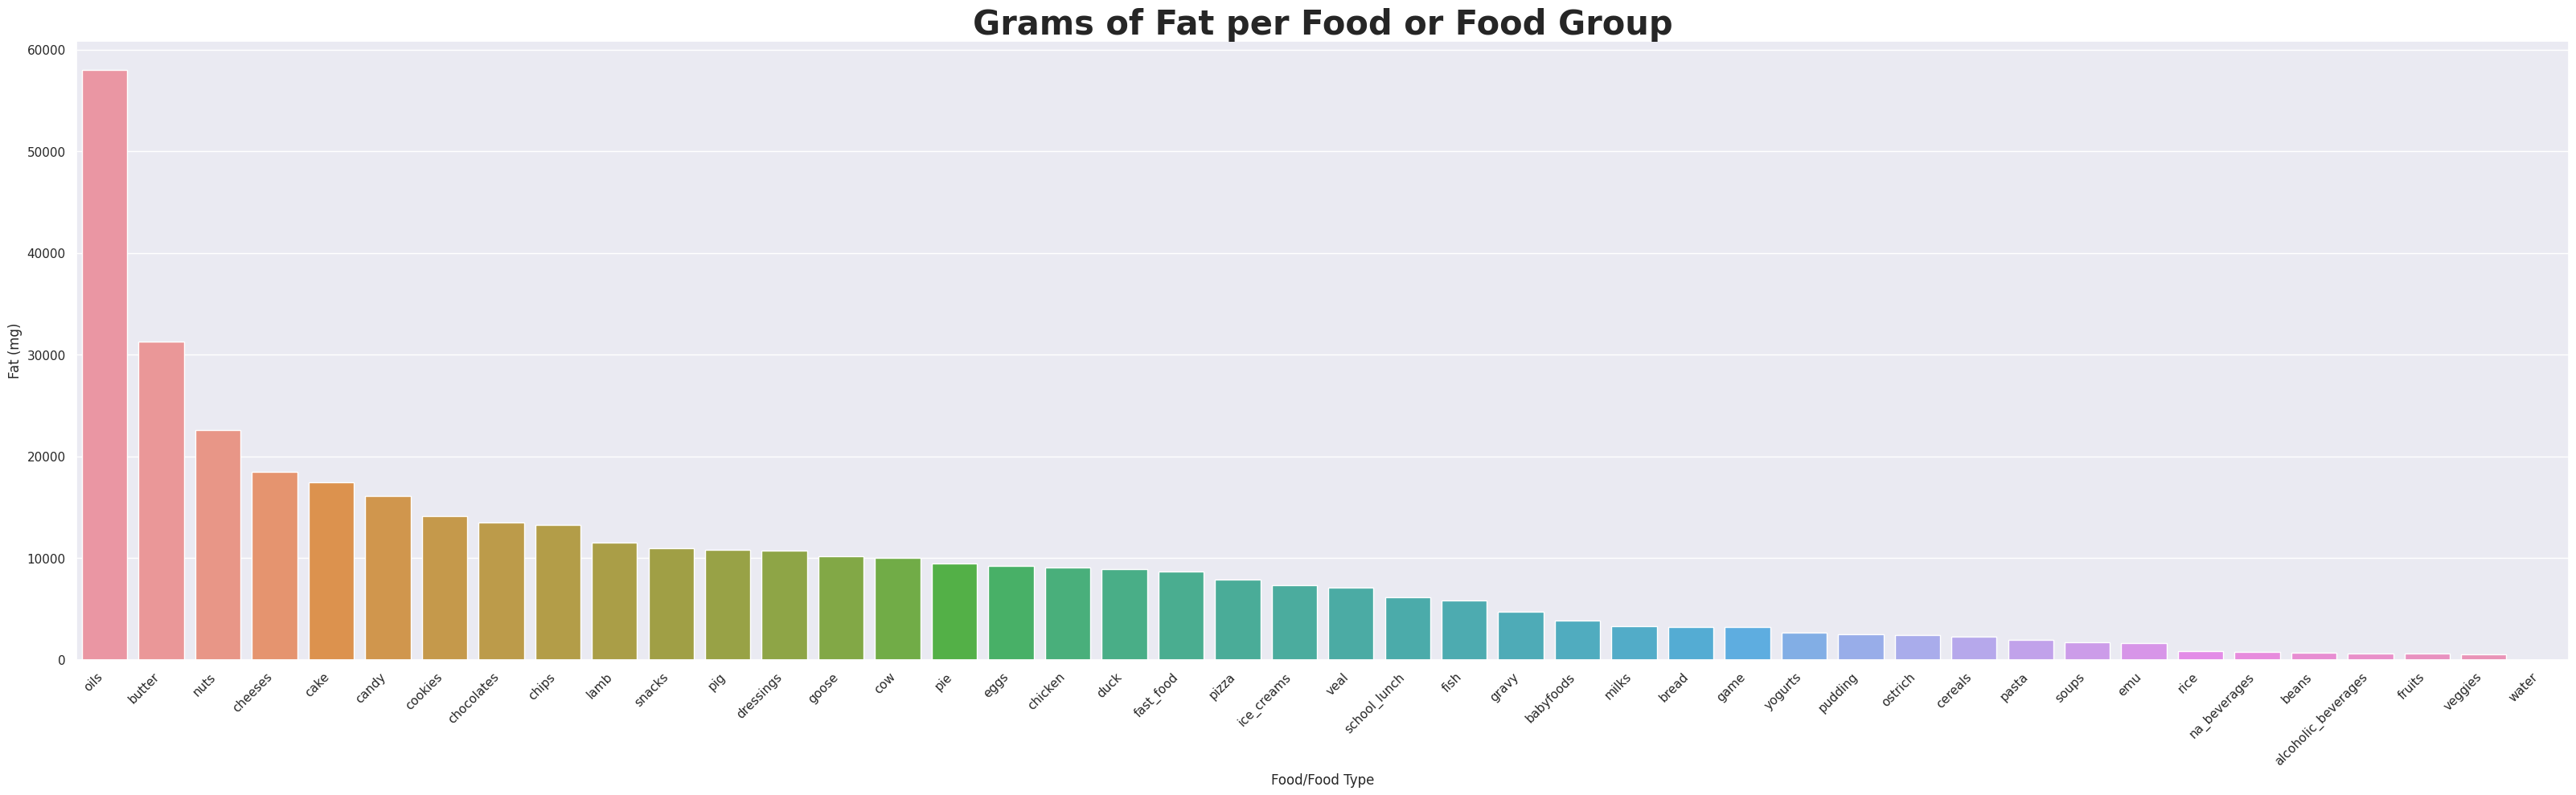

In [24]:
all_averages = all_averages.sort_values(by='Total_Fat_(mg)', ascending=False)

sns.set(rc={"figure.figsize":(40, 10)})
nutrition_barplot = sns.barplot(x=all_averages['Name'], y = all_averages['Total_Fat_(mg)'])
nutrition_barplot.set_ylabel('Fat (mg)')
nutrition_barplot.set_xlabel('Food/Food Type')
nutrition_barplot.set_title('Grams of Fat per Food or Food Group', fontdict={'size': 30, 'weight': 'bold'})
nutrition_barplot.set_xticklabels(nutrition_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylim(0,60)
plt.show()

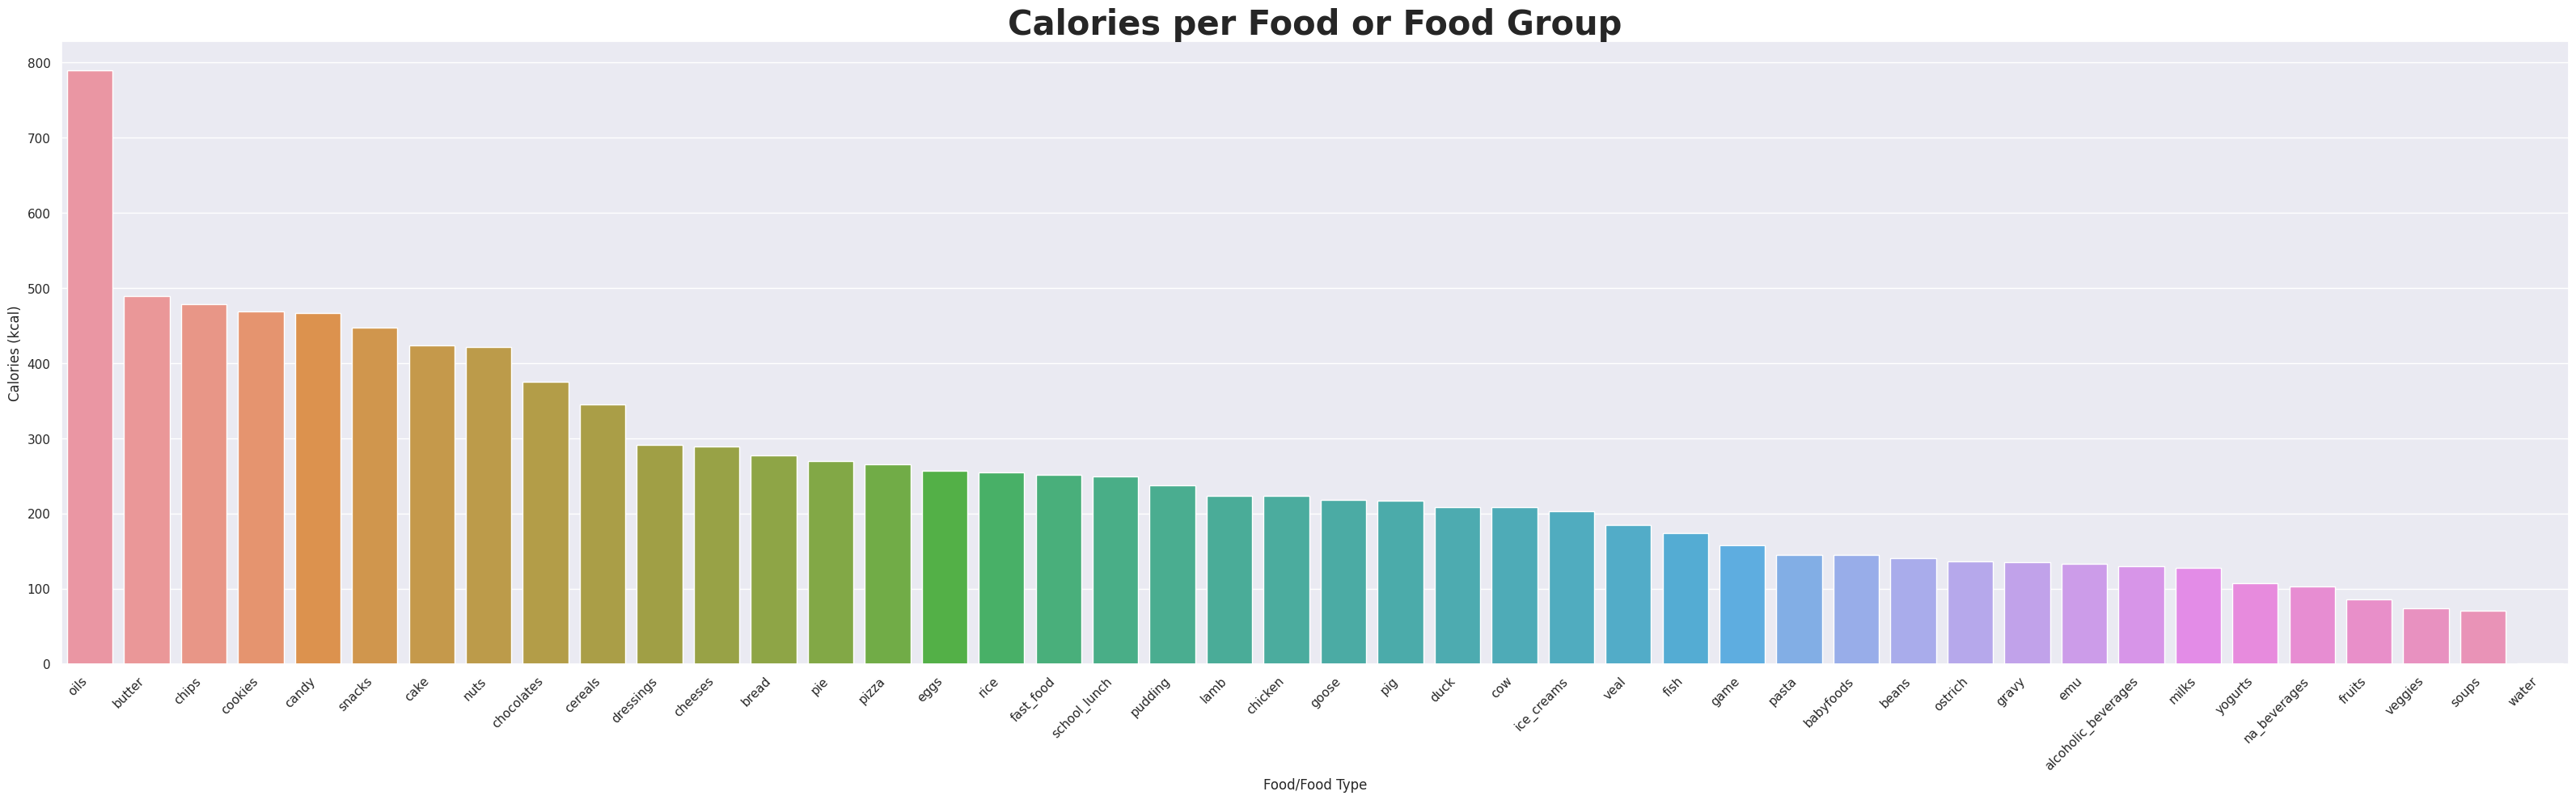

In [25]:
all_averages = all_averages.sort_values(by='Calories', ascending=False)

sns.set(rc={"figure.figsize":(40, 10)})
nutrition_barplot = sns.barplot(x=all_averages['Name'], y = all_averages['Calories'])
nutrition_barplot.set_ylabel('Calories (kcal)')
nutrition_barplot.set_xlabel('Food/Food Type')
nutrition_barplot.set_title('Calories per Food or Food Group', fontdict={'size': 30, 'weight': 'bold'})
nutrition_barplot.set_xticklabels(nutrition_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylim(0,60)
plt.show()

In [26]:
df = df.sort_values(by='Health_Score', ascending=False)
df

,id,Name,Calories,Protein_(mg),Carbs_(mg),Fiber_(mg),Sugar_(mg),Calcium_(mg),Sodium_(mg),Total_Fat_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg),Unhealthy_Nutrients,Healthy_Nutrients,Health_Score
1095,23425,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS,LIVER,RAW",133,20500.0,3600.0,0.0,0.0,4.0,53.0,1649.0,327.0,70390.0,122720.3,5489.0,216081.4,216032.824779
1090,23424,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS LIVER,CKD,BLD",150,23300.0,3780.0,0.0,0.0,4.0,55.0,1925.0,336.0,66440.0,91065.9,6315.0,183358.4,183284.105882
8530,17203,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,CKD,BRSD",192,28420.0,3770.0,0.0,0.0,6.0,78.0,3132.0,329.0,59860.0,91711.8,8757.0,183169.6,183060.137500
4007,4589,"FISH OIL,COD LIVER",902,0.0,0.0,0.0,NaN,0.0,0.0,69319.0,0.0,0.0,140000.2,123178.0,209282.2,181909.311111
5161,17368,"LAMB,NZ,IMP,LIVER,CKD,SOAKED & FRIED",168,25800.0,1480.0,0.0,0.0,5.0,59.0,2973.0,287.0,64600.0,86113.4,9085.0,179570.3,179463.417647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8043,19868,"SWEETENERS,TABLETOP,SUCRALOSE,SPLENDA PACKETS",336,0.0,91170.0,0.0,80330.0,0.0,0.0,0.0,4.0,8830.0,0.0,80330.0,8834.0,-71496.000000
8042,43158,"SWEETENERS,TABLETOP,SACCHARIN (SODIUM SACCHARIN)",360,940.0,89110.0,0.0,85190.0,0.0,428.0,0.0,4.0,8750.0,0.0,85190.0,10122.0,-75068.000000
4413,35233,"HAZELNUTS,BEAKED (NORTHERN PLAINS INDIANS)",628,14890.0,22980.0,9800.0,NaN,441.0,2.0,NaN,738.0,5920.0,0.6,52990.0,32455.5,-100019.500000
5858,4679,"OIL,PAM COOKING SPRAY,ORIGINAL",792,260.0,20690.0,0.0,0.0,0.0,59.0,54817.0,0.0,110.0,0.0,83715.0,72366.0,-206684.000000


## Milks

In [28]:
#Create heatmap to check correlation in data
correlation = df[["Calories", 'Carbs_(mg)', 'Protein_(mg)', "Sugar_(mg)", "Calcium_(mg)", "Total_Fat_(mg)", "Sodium_(mg)", "Potassium_(mg)", "Water_(mg)", 'Vitamins_(mg)']].copy()
sns.set_theme(style="white")
corr = correlation.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')

,Calories,Carbs_(mg),Protein_(mg),Sugar_(mg),Calcium_(mg),Total_Fat_(mg),Sodium_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg)
Calories,1.000000,0.499241,0.110454,0.356841,0.142731,0.754074,0.052966,0.075882,-0.901279,-0.015788
Carbs_(mg),0.499241,1.000000,-0.309397,0.683022,0.213311,-0.093393,0.072657,0.117279,-0.777938,0.009336
Protein_(mg),0.110454,-0.309397,1.000000,-0.305000,0.034184,0.063114,-0.007713,0.237084,-0.096227,-0.020495
Sugar_(mg),0.356841,0.683022,-0.305000,1.000000,0.153815,-0.007221,-0.004933,0.006171,-0.511820,0.015017
Calcium_(mg),0.142731,0.213311,0.034184,0.153815,1.000000,0.014646,0.179147,0.251985,-0.262948,0.057596
Total_Fat_(mg),0.754074,-0.093393,0.063114,-0.007221,0.014646,1.000000,0.001233,-0.051312,-0.432618,-0.016100
Sodium_(mg),0.052966,0.072657,-0.007713,-0.004933,0.179147,0.001233,1.000000,-0.001595,-0.154458,-0.006465
Potassium_(mg),0.075882,0.117279,0.237084,0.006171,0.251985,-0.051312,-0.001595,1.000000,-0.197039,0.129875
Water_(mg),-0.901279,-0.777938,-0.096227,-0.511820,-0.262948,-0.432618,-0.154458,-0.197039,1.000000,-0.000487
Vitamins_(mg),-0.015788,0.009336,-0.020495,0.015017,0.057596,-0.016100,-0.006465,0.129875,-0.000487,1.000000


#### Notes: It appears that there isn't any strong correlations between any of the fields except Water's negative correlation with Calories. The highest positive correlation is between calories and fat, then sugar and carbs.

## Cheese

In [29]:
sns.set_theme(style="white")
corr = cheese.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1)
corr.style.background_gradient(cmap='coolwarm')

,Calories,Protein_(mg),Carbs_(mg),Fiber_(mg),Sugar_(mg),Calcium_(mg),Sodium_(mg),Total_Fat_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg),Unhealthy_Nutrients,Healthy_Nutrients,Health_Score
Calories,1.000000,0.500575,-0.001562,-0.233014,-0.338773,0.535689,0.173702,0.964860,0.092113,-0.956335,0.719377,0.957612,-0.850949,-0.852265
Protein_(mg),0.500575,1.000000,-0.236764,0.075032,-0.370557,0.808283,0.275684,0.337577,-0.239699,-0.640325,0.224079,0.296755,-0.152353,-0.163034
Carbs_(mg),-0.001562,-0.236764,1.000000,-0.019162,0.644819,-0.064057,0.111002,-0.131728,0.890164,-0.142034,0.016323,-0.103514,-0.469854,-0.442653
Fiber_(mg),-0.233014,0.075032,-0.019162,1.000000,-0.001599,0.025374,-0.049953,-0.270913,-0.040337,0.170631,-0.128617,-0.280032,0.268716,0.266700
Sugar_(mg),-0.338773,-0.370557,0.644819,-0.001599,1.000000,-0.238157,0.078456,-0.333561,0.444185,0.299386,-0.184375,-0.235400,0.097680,0.102616
Calcium_(mg),0.535689,0.808283,-0.064057,0.025374,-0.238157,1.000000,0.485584,0.384445,-0.085492,-0.685479,0.303733,0.365821,-0.330665,-0.345682
Sodium_(mg),0.173702,0.275684,0.111002,-0.049953,0.078456,0.485584,1.000000,0.087824,0.080035,-0.323189,0.135848,0.097082,-0.222755,-0.249721
Total_Fat_(mg),0.964860,0.337577,-0.131728,-0.270913,-0.333561,0.384445,0.087824,1.000000,0.004631,-0.853425,0.718832,0.992997,-0.799627,-0.802846
Potassium_(mg),0.092113,-0.239699,0.890164,-0.040337,0.444185,-0.085492,0.080035,0.004631,1.000000,-0.193541,0.117675,0.012163,-0.507513,-0.478247
Water_(mg),-0.956335,-0.640325,-0.142034,0.170631,0.299386,-0.685479,-0.323189,-0.853425,-0.193541,1.000000,-0.652931,-0.843736,0.845611,0.846267


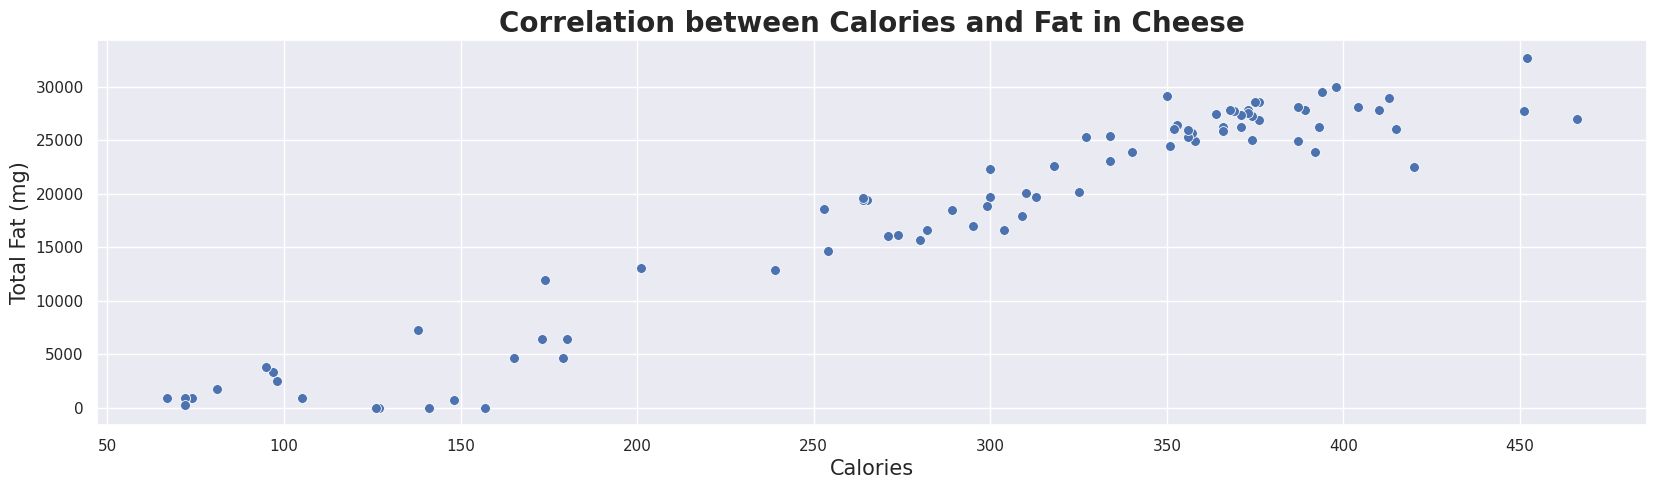

In [30]:
#Scatter plot comparing Calories with Saturated Fat in Cheese
sns.set(rc={"figure.figsize":(20, 5)})
scatter = sns.scatterplot(data=cheese, x='Calories', y='Total_Fat_(mg)', legend='auto', s=50)
scatter.set_title("Correlation between Calories and Fat in Cheese", fontdict={'size': 20, 'weight': 'bold'})
scatter.set_xlabel('Calories', fontdict={'size': 15})
scatter.set_ylabel('Total Fat (mg)', fontdict={'size': 15})
#plt.ylim(-2, 35)
#plt.xlim(0, 500)
plt.show()

### Notes: Strong correlation between fat and calorie content in cheese

## Milk

In [33]:
sns.set_theme(style="white")
corr = milk.corr(method = 'pearson', min_periods = 1)
corr.style.background_gradient(cmap='coolwarm')

,Calories,Protein_(mg),Carbs_(mg),Fiber_(mg),Sugar_(mg),Calcium_(mg),Sodium_(mg),Total_Fat_(mg),Potassium_(mg),Water_(mg),Vitamins_(mg),Unhealthy_Nutrients,Healthy_Nutrients,Health_Score
Calories,1.000000,0.909869,0.928791,-0.117037,0.925994,0.872388,0.610055,0.584780,0.895767,-0.982014,0.522734,0.912362,-0.977810,-0.978268
Protein_(mg),0.909869,1.000000,0.924525,-0.159038,0.915577,0.932100,0.729219,0.250694,0.958660,-0.961234,0.536427,0.739940,-0.914367,-0.912973
Carbs_(mg),0.928791,0.924525,1.000000,-0.065231,0.995871,0.864746,0.673827,0.272786,0.889393,-0.973406,0.502178,0.821141,-0.982257,-0.981418
Fiber_(mg),-0.117037,-0.159038,-0.065231,1.000000,-0.127217,-0.147197,-0.105201,-0.073548,-0.143777,0.114412,-0.069470,-0.067586,0.089227,0.091305
Sugar_(mg),0.925994,0.915577,0.995871,-0.127217,1.000000,0.914049,0.904443,0.333132,0.913837,-0.970132,0.547412,0.916547,-0.978527,-0.978306
Calcium_(mg),0.872388,0.932100,0.864746,-0.147197,0.914049,1.000000,0.436443,0.297562,0.992354,-0.908975,0.610484,0.834261,-0.863595,-0.865827
Sodium_(mg),0.610055,0.729219,0.673827,-0.105201,0.904443,0.436443,1.000000,0.033102,0.511539,-0.674557,0.189787,0.257668,-0.644170,-0.636166
Total_Fat_(mg),0.584780,0.250694,0.272786,-0.073548,0.333132,0.297562,0.033102,1.000000,0.301531,-0.421532,0.223259,0.660587,-0.444183,-0.448012
Potassium_(mg),0.895767,0.958660,0.889393,-0.143777,0.913837,0.992354,0.511539,0.301531,1.000000,-0.934148,0.605508,0.828893,-0.887933,-0.889413
Water_(mg),-0.982014,-0.961234,-0.973406,0.114412,-0.970132,-0.908975,-0.674557,-0.421532,-0.934148,1.000000,-0.534272,-0.865699,0.988625,0.988243


#### Notes: High correlation among many fields, especially sugar, protein, carbs, and calcium. Strong negative correlation between water and most other fields.

### Are "lowfat milks" really low in fat?

In [34]:
#milk = milk.sort_values(by='Saturated_Fat_(g)', ascending=False)
fat = ['NONFAT', 'FAT FREE', 'LOWFAT', 'LOW FAT', 'LO FAT']
pattern = '|'.join(fat)

lowfat_milk = milk[milk["Name"].str.contains(pattern)]
other_milk = milk[~milk["Name"].str.contains(pattern)]

#Create row for "low fat" milk with averages for all columns
lowfat_milk.loc['9998'] = lowfat_milk.mean()
lowfat_milk.loc['9998', ['Name']] = ['Low_Fat_Milk_Average']
lowfat_milk.loc['9998', ['id']] = ['99998']
lowfat_milk = lowfat_milk.round(decimals=2)

#Create row for all other milk with averages for all columns
other_milk.loc['9999'] = other_milk.mean()
other_milk.loc['9999', ['Name']] = ['Other_Milk_Average']
other_milk.loc['9999', ['id']] = ['99999']
other_milk = other_milk.round(decimals=2)

#Combine the two and compare
compare_milk = pd.concat([lowfat_milk.loc['9998'], other_milk.loc['9999']], axis=1)
compare_milk.rename(columns={'9998': 'Low_Fat_Milk_Average', '9999': 'Other_Milk_Average'}, inplace=True)

#drop first two rows
compare_milk = compare_milk.iloc[2:]
compare_milk

,Low_Fat_Milk_Average,Other_Milk_Average
Calories,137.88,121.99
Protein_(mg),13220.0,6564.9
Carbs_(mg),19556.47,12154.72
Fiber_(mg),5.88,105.49
Sugar_(mg),21639.17,13114.78
Calcium_(mg),414.65,237.99
Sodium_(mg),310.53,101.44
Total_Fat_(mg),584.12,4774.4
Potassium_(mg),578.71,311.36
Water_(mg),63645.88,74439.57


### Notes: The Low Fat Milk option does have less fat than other milks, as well as more protein, calcium, and a higher Health Score. However, the calorie count remains similar among both

## Compare Fruits and Veggies

In [35]:
#combine averages and transpose the data
fruits_veggies_averages = pd.concat([fruits_average, veggies_average])
fruits_veggies_averages = fruits_veggies_averages.transpose()
fruits_veggies_averages.columns = ('Fruits', 'Veggie')
fruits_veggies_averages

#drop first two rows
fruits_veggies_averages = fruits_veggies_averages.iloc[2:]

fruits_veggies_averages

,Fruits,Veggie
Calories,85.8,73.36
Protein_(mg),1535.27,2249.58
Carbs_(mg),19218.96,10446.13
Fiber_(mg),2201.82,2302.01
Sugar_(mg),13534.41,5584.82
Calcium_(mg),34.25,55.25
Sodium_(mg),33.19,138.34
Total_Fat_(mg),581.96,485.12
Potassium_(mg),233.8,288.78
Water_(mg),77428.46,82551.71


#### Notes: Veggies tend to be lower in calories, carbs, sugar, and fat, while much higher in Sodium and Vitamins compared to Fruit. Fruit has a slightly higher Health Score.

## Compare Meats

In [36]:
meats_list = [cow_average, pig_average, chicken_average, game_average, lamb_average, veal_average, emu_average, ostrich_average, duck_average, goose_average, fish_average]
              
# combine all the dataframes into one using concat
meat_averages = pd.concat(meats_list, ignore_index=True)
meat_averages = pd.DataFrame(meat_averages)
meat_averages = meat_averages.sort_values(by='Health_Score', ascending=False)
meat_averages = meat_averages.transpose()
meat_averages.columns = ('ostrich', 'goose', 'emu', 'duck', 'veal', 'game', 'fish', 'chicken', 'cow', 'pig', 'lamb')
meat_averages = meat_averages.iloc[2:]
meat_averages

,ostrich,goose,emu,duck,veal,game,fish,chicken,cow,pig,lamb
Calories,135.94,133.0,218.0,185.06,157.88,208.77,208.22,173.93,223.54,223.48,217.41
Protein_(mg),24553.33,26106.67,21041.43,24004.19,26626.79,19182.31,23583.69,18668.08,22374.97,21617.82,20303.11
Carbs_(mg),0.0,0.0,1095.71,381.24,0.0,5117.69,639.42,3459.69,129.04,3167.34,1916.52
Fiber_(mg),0.0,0.0,0.0,5.15,0.0,66.67,48.18,335.14,9.02,186.7,121.98
Sugar_(mg),0.0,0.0,313.33,21.92,0.0,5245.0,93.14,485.31,14.46,345.36,498.1
Calcium_(mg),5.72,5.33,22.71,16.3,10.43,13.54,13.77,43.57,13.93,25.9,18.9
Sodium_(mg),77.22,97.67,90.57,94.1,61.56,117.08,104.98,330.19,70.87,244.57,502.15
Total_Fat_(mg),2378.17,1600.42,10196.86,7089.15,3167.92,8870.08,9973.41,5847.88,11542.55,9059.23,10824.33
Potassium_(mg),332.78,321.67,317.29,297.76,353.57,221.33,309.23,345.68,270.58,221.46,309.38
Water_(mg),72170.0,70396.67,62875.71,65380.86,67109.46,62877.69,62967.46,67072.8,62570.21,60937.07,62104.49


#### Notes: Ostrich and Goose have the highest Health Scores, Chicken contains the most calories, Game and Emu contain the most protein, Lamb contains the most fat, Pig contains (by far) the most sodium, and fish contains the most vitamins and potassium.

## Compare Alcoholic Beverages, Non-Alcohol Beverages, and Water

In [37]:
#combine averages and transpose the data
beverage_averages = pd.concat([na_beverages_average, alcoholic_beverages_average, water_average])
beverage_averages = beverage_averages.transpose()
beverage_averages.columns = ('Non-Alcoholic Beverages', 'Alcoholic Beverages', 'Water')
beverage_averages

#drop first two rows
beverage_averages = beverage_averages.iloc[2:]

beverage_averages

,Non-Alcoholic Beverages,Alcoholic Beverages,Water
Calories,103.39,129.8,0.33
Protein_(mg),2433.56,1025.27,0.0
Carbs_(mg),17167.49,7737.3,43.33
Fiber_(mg),718.03,127.08,0.0
Sugar_(mg),12319.93,7724.59,0.0
Calcium_(mg),71.83,12.33,5.0
Sodium_(mg),72.31,25.35,5.67
Total_Fat_(mg),741.48,598.46,0.0
Potassium_(mg),249.81,82.46,1.33
Water_(mg),75809.42,77272.03,99943.33


### Notes: Non-Alcoholic Beverages have a higher Health Score, but generally have more carbs and sugar, while Alcoholic Beverages have more calories and sodium.

## Compare baby food, fast food, and school lunches

In [38]:
#combine averages and transpose the data
bf_ff_sl_averages = pd.concat([babyfoods_average, fast_food_average, school_lunches_average])
bf_ff_sl_averages = bf_ff_sl_averages.transpose()
bf_ff_sl_averages.columns = ('Baby Foods', 'Fast Food', 'School Lunch')
bf_ff_sl_averages

#drop first two rows
bf_ff_sl_averages = bf_ff_sl_averages.iloc[2:]

bf_ff_sl_averages

,Baby Foods,Fast Food,School Lunch
Calories,144.32,251.4,249.15
Protein_(mg),3933.8,12195.61,13523.08
Carbs_(mg),21117.51,22419.04,27435.38
Fiber_(mg),954.15,1435.52,3430.77
Sugar_(mg),13396.16,4849.23,4965.38
Calcium_(mg),130.53,98.09,165.0
Sodium_(mg),52.96,549.37,461.46
Total_Fat_(mg),3834.68,8671.48,6113.62
Potassium_(mg),190.38,211.08,309.31
Water_(mg),68946.92,50526.27,47355.38


#### Notes: School Lunches have the highest health score. Nutrients in Fast food and School Lunches are comparable on all metrics but calcium, while baby foods are lowest in most metrics, but very high in vitamins

## Pizzas

In [ ]:
snack